In [25]:
from pathlib import Path
from mne_bids import BIDSPath, get_entity_vals
import json
import matplotlib.pyplot as plt
import collections
import pandas as pd
import numpy as np

In [3]:
root = Path("D:/OneDriveParent/OneDrive - Johns Hopkins/Shared Documents/bids")
deriv_root = root / "derivatives"
deriv_chain = Path("sourcesink") / "monopolar"

In [4]:
bids_paths = collections.defaultdict(list)
subjects = get_entity_vals(root, 'subject')
for sub in subjects:
    ignore_subjects = [s for s in subjects if s is not sub]
    tasks = get_entity_vals(root, 'task', ignore_subjects=ignore_subjects)
    if len(tasks) == 0:
        tasks = [None]
    for task in tasks:
        ignore_tasks = [t for t in tasks if t is not task]
        runs = get_entity_vals(root, 'run', ignore_subjects=ignore_subjects, ignore_tasks=ignore_tasks)
        for run in runs:
            bids_parameters = {
                "subject": sub,
                "task": task,
                "run": run
            }
            bids_path = BIDSPath(root=root, **bids_parameters)
            bids_paths[sub].append(bids_path)

In [8]:
xy_features = dict()
for sub, paths in bids_paths.items():
    sub_dir = deriv_root / deriv_chain / f"sub-{sub}"
    xy_features[sub] = dict()
    for path in paths:
        distance_fpath = sub_dir / f"{path.basename}_xydistance.json"
        with open(distance_fpath) as fid:
            lobe_distances = json.load(fid)
        xy_features[sub]["dist-frontal"] = lobe_distances["frontal"]
        xy_features[sub]["dist-parietal"] = lobe_distances["parietal"]
        xy_features[sub]["dist-occipital"] = lobe_distances["occipital"]
        xy_features[sub]["dist-temporal"] = lobe_distances["temporal"]
        
        variance_fpath = sub_dir / f"{path.basename}_xyvariance.json"
        with open(variance_fpath) as fid:
            lobe_variances = json.load(fid)
        xy_features[sub]["var-frontal"] = lobe_variances["frontal"]
        xy_features[sub]["var-parietal"] = lobe_variances["parietal"]
        xy_features[sub]["var-occipital"] = lobe_variances["occipital"]
        xy_features[sub]["var-temporal"] = lobe_variances["temporal"]
        
        cm_fpath = sub_dir / f"{path.basename}_xycenterofmass.json"
        with open(cm_fpath) as fid:
            lobe_cms = json.load(fid)
        xy_features[sub]["cm-frontal"] = lobe_cms["frontal"]
        xy_features[sub]["vcm-parietal"] = lobe_cms["parietal"]
        xy_features[sub]["cm-occipital"] = lobe_cms["occipital"]
        xy_features[sub]["cm-temporal"] = lobe_cms["temporal"]

In [14]:
xy_feature_df = pd.DataFrame.from_dict(xy_features, orient='index')
xy_feature_df

,dist-frontal,dist-parietal,dist-occipital,dist-temporal,var-frontal,var-parietal,var-occipital,var-temporal,cm-frontal,vcm-parietal,cm-occipital,cm-temporal
jhh001,0.647977,0.711626,1.047155,0.617973,0.075485,0.061903,0.118940,0.076870,"[1.2763157894736843, 0.4342105263157895]","[3.0506329113924058, 0.4683544303797469]","[1.6923076923076923, 0.717948717948718]","[1.4411764705882353, 0.39705882352941174]"
jhh002,0.564343,0.648562,1.137518,0.747767,0.039993,0.082594,0.110760,0.077865,"[1.4333333333333333, 0.4]","[2.5508474576271185, 0.41525423728813554]","[1.5824175824175823, 0.7362637362637362]","[1.469135802469136, 0.46913580246913583]"
jhh003,0.700120,0.648541,0.913621,0.800294,0.143352,0.051614,0.081544,0.074619,"[1.2613636363636362, 0.4772727272727272]","[3.0000000000000004, 0.45588235294117657]","[1.5365853658536586, 0.5975609756097561]","[1.472972972972973, 0.5]"
jhh004,0.608445,0.782521,1.037586,0.650408,0.065746,0.063161,0.107168,0.060249,"[1.3636363636363635, 0.393939393939394]","[2.5794392523364493, 0.5233644859813086]","[1.329787234042553, 0.6489361702127658]","[1.8250000000000002, 0.425]"
jhh005,0.647858,0.609301,1.000100,0.819998,0.082929,0.070326,0.099723,0.072542,"[1.2714285714285714, 0.4285714285714286]","[3.0675675675675675, 0.4054054054054054]","[1.532608695652174, 0.6521739130434784]","[1.3, 0.5714285714285715]"
...,...,...,...,...,...,...,...,...,...,...,...,...
jhh225,0.746710,0.614850,1.024036,0.690190,0.090028,0.075527,0.122533,0.036314,"[1.5138888888888886, 0.5277777777777778]","[2.7173913043478257, 0.40579710144927533]","[1.4533333333333334, 0.7066666666666668]","[1.5894736842105261, 0.4526315789473684]"
jhh226,0.907551,0.626032,1.004287,0.555446,0.080159,0.061634,0.076480,0.105956,"[1.3829787234042552, 0.5638297872340424]","[2.917293233082706, 0.41353383458646614]","[1.4606741573033708, 0.6741573033707865]","[1.3593750000000002, 0.34375000000000006]"
jhh227,0.626337,0.708768,0.961332,0.770473,0.123096,0.071867,0.075441,0.060769,"[1.1829268292682926, 0.39024390243902435]","[3.227586206896551, 0.46206896551724136]","[1.2985074626865674, 0.6865671641791045]","[1.4651162790697676, 0.5232558139534883]"
jhh228,0.735892,0.587393,1.068084,0.722880,0.047741,0.109955,0.104527,0.042763,"[1.1449275362318843, 0.47826086956521746]","[2.7605633802816905, 0.38732394366197187]","[1.325301204819277, 0.7228915662650602]","[1.6744186046511624, 0.4883720930232557]"


In [18]:
groups = []
indices = list(xy_feature_df.index)
for index in indices:
    sub_id = int(index.replace("jhh", ""))
    if sub_id < 100:
        groups.append(0)
    elif sub_id > 200:
        groups.append(2)
    elif 100 < sub_id < 200:
        groups.append(1)
xy_feature_df['group'] = groups

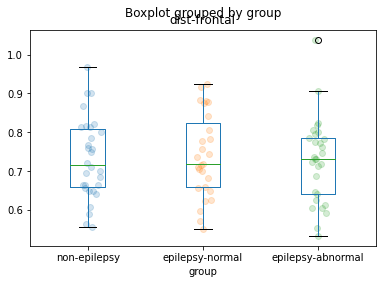

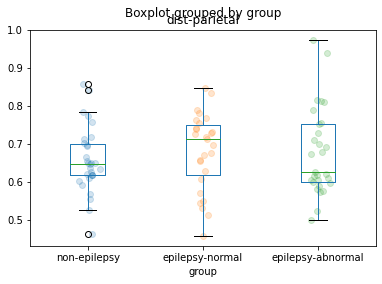

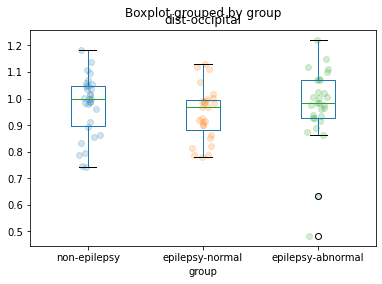

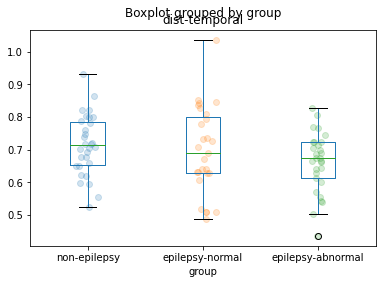

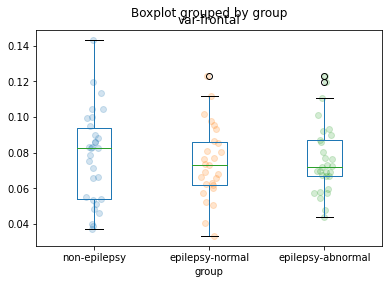

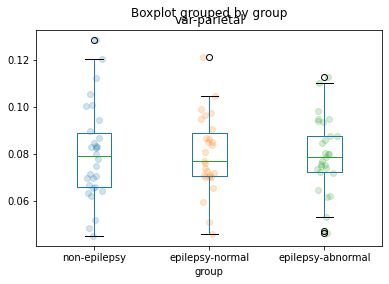

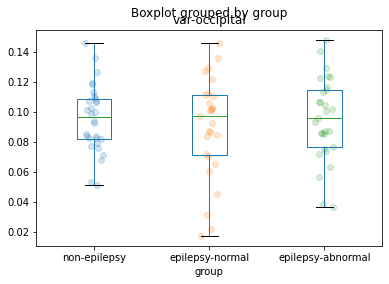

In [33]:
group_names = ['non-epilepsy', 'epilepsy-normal', 'epilepsy-abnormal']
xticks = [i+1 for i, g in enumerate(group_names)]
colnames = xy_feature_df.columns[0:7]
for col in colnames:
    fig,ax = plt.subplots()
    bp = xy_feature_df.boxplot(column=col, by='group', grid=False, ax=ax)
    for gdx, g in enumerate(group_names):
        feature_group = [f for idx, f in enumerate(xy_feature_df[col]) if xy_feature_df['group'][idx]==gdx]
        x = np.random.normal(gdx+1, 0.04, size=len(feature_group))
        plt.scatter(x, feature_group, alpha=0.2, label=g)
    ax.set_xticks(xticks)
    ax.set_xticklabels(group_names)
    ax.set_title(col)
    plt.show()